In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic = pd.read_csv("train.csv")

In [3]:
titanic.head()   # Head of data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Finding the missing values in the data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Data Cleaning : Removing null columns or columns which are very less impactful for analysis.

In [6]:
# Since Cabin column has most missing values hence we will not use this column.
# Also the Name column, SibSp, Ticket columns are not useful.
# hence we will drop these columns.

titanic = titanic.drop(['Name','SibSp','Ticket', 'Cabin'], axis=1)

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked
0,1,0,3,male,22.0,0,7.2500,S
1,2,1,1,female,38.0,0,71.2833,C
2,3,1,3,female,26.0,0,7.9250,S
3,4,1,1,female,35.0,0,53.1000,S
4,5,0,3,male,35.0,0,8.0500,S


In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [9]:
titanic.size  # In total 7128 values are present.

7128

In [10]:
titanic.shape   # In total 891 rows and 8 columns are present.

(891, 8)

In [11]:
titanic['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
titanic['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6])

In [13]:
titanic['Pclass'].unique()

array([3, 1, 2])

#### pclass - passenger class (1st, 2nd, 3rd).
#### parch - Number of Parents/Children Aboard.
#### Embarked - Port from where they started the journey. (from google I found that : S-Southhampton, C-Cherbourg, Q-Queenstown)

In [15]:
# Modifying the data for easy understanding and visualization.
# In survived column :-  0:Dead, 1:Survived
# In Pclass column :- 1 : 1st Class, 2 : 2nd Class, 3 : 3rd Class
# In Embarked column :- S : Southhampton, C : Cherbourg, Q : Queenstown

titanic['Survival'] = titanic.Survived.map({0 : 'Dead', 1: 'Survived'})
titanic['Class'] = titanic.Pclass.map({1 : '1st Class', 2 : '2nd Class', 3 : '3rd Class'})
titanic['Embarked'] = titanic.Embarked.map({'S' : 'Southhampton', 'C' : 'Cherbourg', 'Q' : 'Queenstown'})

In [16]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Survival,Class
0,1,0,3,male,22.0,0,7.2500,Southhampton,Dead,3rd Class
1,2,1,1,female,38.0,0,71.2833,Cherbourg,Survived,1st Class
2,3,1,3,female,26.0,0,7.9250,Southhampton,Survived,3rd Class
3,4,1,1,female,35.0,0,53.1000,Southhampton,Survived,1st Class
4,5,0,3,male,35.0,0,8.0500,Southhampton,Dead,3rd Class


In [17]:
# Parch is nor necessary for analysis.['Survived' and 'Pclass' are renamed as 'Survival' and 'Class'].
titanic = titanic.drop(['Pclass', 'Survived', 'Parch'], axis = 1)
titanic.head()


,PassengerId,Sex,Age,Fare,Embarked,Survival,Class
0,1,male,22.0,7.2500,Southhampton,Dead,3rd Class
1,2,female,38.0,71.2833,Cherbourg,Survived,1st Class
2,3,female,26.0,7.9250,Southhampton,Survived,3rd Class
3,4,female,35.0,53.1000,Southhampton,Survived,1st Class
4,5,male,35.0,8.0500,Southhampton,Dead,3rd Class


Text(0, 0.5, 'Count')

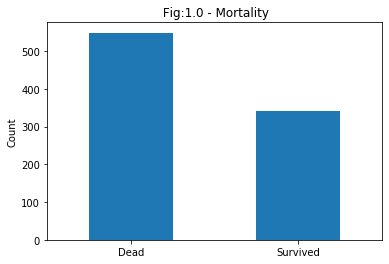

In [18]:
# Visualizing peoples by survival : 

titanic['Survival'].value_counts().plot(kind='bar', title=' Fig:1.0 - Mortality')
plt.xticks(rotation = 0)
plt.ylabel('Count')

Text(0, 0.5, 'Counts')

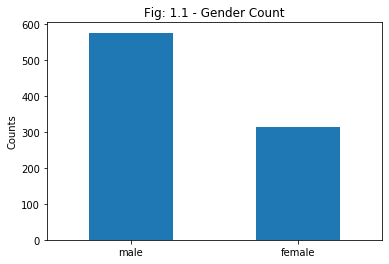

In [19]:
# Visualizing peoples by Gender : 

titanic['Sex'].value_counts().plot(kind = 'bar', title = 'Fig: 1.1 - Gender Count')
plt.xticks(rotation = 0)
plt.ylabel('Counts')

Text(0.5, 1.0, 'Fig: 1.2 - Passengers by age')

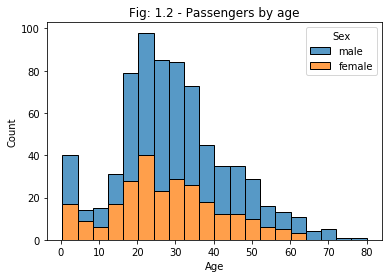

In [20]:
# Visualizing peoples by age :

sns.histplot(x = 'Age', data = titanic, hue = 'Sex', multiple = 'stack').set_title('Fig: 1.2 - Passengers by age')

# From this we can say that majority of peoples were from age group 15-35 (Adults).
# and male count was almost double to the female count in every age group.

Text(0, 0.5, 'Counts')

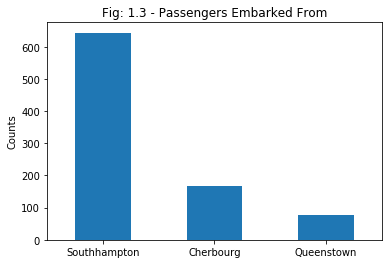

In [21]:
titanic['Embarked'].value_counts().plot(kind = 'bar', title = 'Fig: 1.3 - Passengers Embarked From')
plt.xticks(rotation = 0)
plt.ylabel('Counts')

# Majority of peoples were from Southhampton.

Text(0, 0.5, 'Counts')

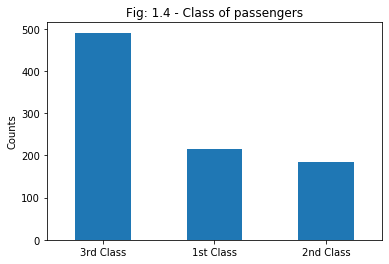

In [22]:
# Peoples Class:
titanic['Class'].value_counts().plot(kind = 'bar', title = 'Fig: 1.4 - Class of passengers')
plt.xticks(rotation = 0)
plt.ylabel('Counts')
# Majority of peoples were sitting in 3rd class.

In [23]:
# In this data some of the age values are NaN, hence we will find out those values and try
# to substitute them with suitable value. 

age_null = titanic.Age[titanic['Age'].isna()]  
len(age_null)

# Total 177 passengers are having age data missing. We will fill those values using mean value of age.

177

In [24]:
titanic['Age'].mean()

29.69911764705882

In [25]:
titanic['Age'] = titanic['Age'].fillna(titanic['Age'].mean())

In [26]:
titanic.head()

,PassengerId,Sex,Age,Fare,Embarked,Survival,Class
0,1,male,22.0,7.2500,Southhampton,Dead,3rd Class
1,2,female,38.0,71.2833,Cherbourg,Survived,1st Class
2,3,female,26.0,7.9250,Southhampton,Survived,3rd Class
3,4,female,35.0,53.1000,Southhampton,Survived,1st Class
4,5,male,35.0,8.0500,Southhampton,Dead,3rd Class


In [27]:
(titanic.groupby(['Sex', 'Survival', 'Class', 'Embarked'])['Age']).count()

Sex     Survival  Class      Embarked    
female  Dead      1st Class  Cherbourg         1
                             Southhampton      2
                  2nd Class  Southhampton      6
                  3rd Class  Cherbourg         8
                             Queenstown        9
                             Southhampton     55
        Survived  1st Class  Cherbourg        42
                             Queenstown        1
                             Southhampton     46
                  2nd Class  Cherbourg         7
                             Queenstown        2
                             Southhampton     61
                  3rd Class  Cherbourg        15
                             Queenstown       24
                             Southhampton     33
male    Dead      1st Class  Cherbourg        25
                             Queenstown        1
                             Southhampton     51
                  2nd Class  Cherbourg         8
                           

In [28]:
pclass_survival = titanic.groupby('Class')['Survival'].value_counts().unstack()
pclass_survival

Survival,Dead,Survived
Class,,
1st Class,80,136
2nd Class,97,87
3rd Class,372,119


In [29]:
titanic.groupby('Class')['Survival'].value_counts(normalize = True).unstack()

# From this data we can infer that the passengers belonging to the 3rd class (either Male or Female)
# has less than 25% probability of survival.

Survival,Dead,Survived
Class,,
1st Class,0.370370,0.629630
2nd Class,0.527174,0.472826
3rd Class,0.757637,0.242363


In [30]:
titanic.groupby(['Class', 'Sex'])['Survival'].value_counts(normalize = True).unstack()

Survival              Dead  Survived
Class     Sex                       
1st Class female  0.031915  0.968085
          male    0.631148  0.368852
2nd Class female  0.078947  0.921053
          male    0.842593  0.157407
3rd Class female  0.500000  0.500000
          male    0.864553  0.135447

In [31]:
titanic.loc[(titanic.Age <= 50),  'AgeGroup'] = 'Young'
titanic.loc[(titanic.Age > 50),  'AgeGroup'] = 'Old'
titanic.head()

,PassengerId,Sex,Age,Fare,Embarked,Survival,Class,AgeGroup
0,1,male,22.0,7.2500,Southhampton,Dead,3rd Class,Young
1,2,female,38.0,71.2833,Cherbourg,Survived,1st Class,Young
2,3,female,26.0,7.9250,Southhampton,Survived,3rd Class,Young
3,4,female,35.0,53.1000,Southhampton,Survived,1st Class,Young
4,5,male,35.0,8.0500,Southhampton,Dead,3rd Class,Young


In [32]:
titanic['AgeGroup'].value_counts()

Young    827
Old       64
Name: AgeGroup, dtype: int64

In [33]:
titanic['Survival'] = titanic.Survival.map({'Dead':0, 'Survived':1})
titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

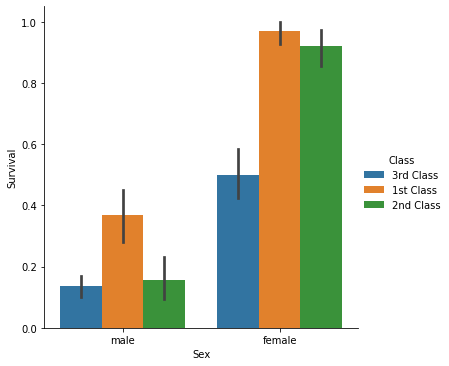

In [34]:
sns.catplot(x='Sex', y='Survival', hue = 'Class', kind = 'bar', data = titanic, col_order=(['1st Class', '2nd Class', '3rd Class'])).set_titles('Fig: 1.5 - Peoples Survived by Gender and Class')

From above graph also we can conclude that survival rate of Male in 1st class is even less than the survival rate of Female in 3rd class even there were less no of females.

In [36]:
titanic['Survival'] = titanic.Survival.map({0: 'Dead', 1: 'Survived'})

In [37]:
df = titanic.groupby(['Sex','Class', 'Embarked', 'Survival' ])['Age'].describe()
df

count       mean        std  \
Sex    Class     Embarked     Survival                                
female 1st Class Cherbourg    Dead        1.0  50.000000        NaN   
                              Survived   42.0  34.964181  12.367782   
                 Queenstown   Survived    1.0  33.000000        NaN   
                 Southhampton Dead        2.0  13.500000  16.263456   
                              Survived   46.0  33.278184  12.706974   
       2nd Class Cherbourg    Survived    7.0  19.142857   8.706866   
                 Queenstown   Survived    2.0  29.849559   0.212756   
                 Southhampton Dead        6.0  36.000000  12.915107   
                              Survived   61.0  29.101625  12.805018   
       3rd Class Cherbourg    Dead        8.0  24.074669  11.579818   
                              Survived   15.0  16.019765  11.813378   
                 Queenstown   Dead        9.0  28.810719   6.102076   
                              Survived   24.0  27.178468   5.161122   
                 Southhampton Dead       55.0  24.781658  12.148156   
                              Survived   33.0  22.981765  12.502182   
male   1st Class Cherbourg    Dead       25.0  40.379824  15.908507   
                              Survived   17.0  36.041125  12.461622   
                 Queenstown   Dead        1.0  44.000000        NaN   
                 Southhampton Dead       51.0  41.984123  13.583568   
                              Survived   28.0  35.204160  15.395618   
       2nd Class Cherbourg    Dead        8.0  29.524890   4.080173   
                              Survived    2.0  15.349559  20.293341   
                 Queenstown   Dead        1.0  57.000000        NaN   
                 Southhampton Dead       82.0  33.142618  11.949460   
                              Survived   15.0  17.935275  19.375524   
       3rd Class Cherbourg    Dead       33.0  28.529902   6.488063   
                              Survived   10.0  21.851735   9.523689   
                 Queenstown   Dead       36.0  29.113325  12.822167   
                              Survived    3.0  29.466078   0.403636   
                 Southhampton Dead      231.0  27.683370  10.363613   
                              Survived   34.0  23.729308  11.535753   

                                              min        25%        50%  \
Sex    Class     Embarked     Survival                                    
female 1st Class Cherbourg    Dead      50.000000  50.000000  50.000000   
                              Survived  16.000000  24.000000  31.500000   
                 Queenstown   Survived  33.000000  33.000000  33.000000   
                 Southhampton Dead       2.000000   7.750000  13.500000   
                              Survived  14.000000  22.250000  32.000000   
       2nd Class Cherbourg    Survived   3.000000  15.500000  22.000000   
                 Queenstown   Survived  29.699118  29.774338  29.849559   
                 Southhampton Dead      24.000000  26.250000  32.500000   
                              Survived   2.000000  24.000000  29.000000   
       3rd Class Cherbourg    Dead       9.000000  16.375000  23.849559   
                              Survived   0.750000   4.500000  15.000000   
                 Queenstown   Dead      18.000000  29.699118  29.699118   
                              Survived  15.000000  29.699118  29.699118   
                 Southhampton Dead       2.000000  18.000000  28.000000   
                              Survived   1.000000  18.000000  24.000000   
male   1st Class Cherbourg    Dead      18.000000  29.699118  36.000000   
                              Survived  17.000000  26.000000  35.000000   
                 Queenstown   Dead      44.000000  44.000000  44.000000   
                 Southhampton Dead      19.000000  29.699118  40.000000   
                              Survived   0.920000  29.274338  35.500000   
       2nd Class Cherbourg    Dead      23.000

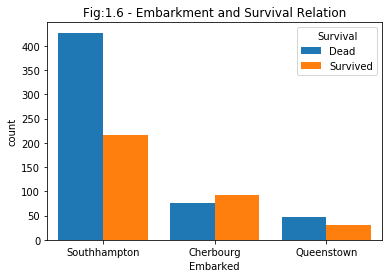

In [38]:
sns.countplot(x="Embarked", hue="Survival", data=titanic, saturation = 1).set_title('Fig:1.6 - Embarkment and Survival Relation')
plt.show()

Text(0.5, 1.0, 'Fig: 1.7 - Embarkment-Survival-Gender Relation')

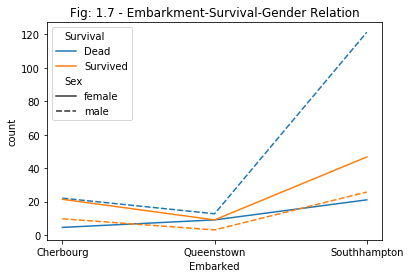

In [39]:
sns.lineplot(x='Embarked', y='count', hue='Survival', data = df, style = 'Sex', ci=None).set_title('Fig: 1.7 - Embarkment-Survival-Gender Relation')


Passengers belonging to southhampton has highest male count (from data 231 male passengers) and hence the number of passengers died are more from southhampton only.

Text(0.5, 1.0, 'Fig: 1.8 - Class-Survival-Gender Relation')

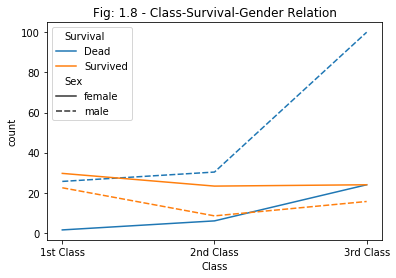

In [41]:
sns.lineplot(x='Class', y='count', hue='Survival', data = df, style = 'Sex', ci = None).set_title('Fig: 1.8 - Class-Survival-Gender Relation')

In [42]:
titanic.head()

,PassengerId,Sex,Age,Fare,Embarked,Survival,Class,AgeGroup
0,1,male,22.0,7.2500,Southhampton,Dead,3rd Class,Young
1,2,female,38.0,71.2833,Cherbourg,Survived,1st Class,Young
2,3,female,26.0,7.9250,Southhampton,Survived,3rd Class,Young
3,4,female,35.0,53.1000,Southhampton,Survived,1st Class,Young
4,5,male,35.0,8.0500,Southhampton,Dead,3rd Class,Young


In [43]:
df1 = titanic.groupby(['Embarked', 'Class', 'Survival'])['Fare'].describe()
df1


count        mean         std      min  \
Embarked     Class     Survival                                           
Cherbourg    1st Class Dead       26.0   78.841981   64.541917  27.7208   
                       Survived   59.0  116.121754  109.514928  26.5500   
             2nd Class Dead        8.0   25.418225   10.668990  12.8750   
                       Survived    9.0   25.305100   12.562460  12.0000   
             3rd Class Dead       41.0    9.878361    4.093219   4.0125   
                       Survived   25.0   13.404668    5.320055   7.2250   
Queenstown   1st Class Dead        1.0   90.000000         NaN  90.0000   
                       Survived    1.0   90.000000         NaN  90.0000   
             2nd Class Dead        1.0   12.350000         NaN  12.3500   
                       Survived    2.0   12.350000    0.000000  12.3500   
             3rd Class Dead       45.0   11.654167    7.448127   6.7500   
                       Survived   27.0   10.398770    5.336266   7.7333   
Southhampton 1st Class Dead       53.0   57.260926   58.473662   0.0000   
                       Survived   74.0   79.750114   57.622869  25.9292   
             2nd Class Dead       88.0   18.946591   15.661432   0.0000   
                       Survived   76.0   21.926316   10.697942  10.5000   
             3rd Class Dead      286.0   14.529906   13.296621   0.0000   
                       Survived   67.0   15.131464   13.279499   0.0000   

                                      25%      50%        75%       max  
Embarked     Class     Survival                                          
Cherbourg    1st Class Dead      29.94895  55.4417  108.28125  247.5208  
                       Survived  57.97920  79.2000  113.27500  512.3292  
             2nd Class Dead      15.04895  25.8604   31.80415   41.5792  
                       Survived  13.85830  24.0000   37.00420   41.5792  
             3rd Class Dead       7.22500   7.2292   14.45420   21.6792  
                       Survived   7.22920  14.4542   18.78750   22.3583  
Queenstown   1st Class Dead      90.00000  90.0000   90.00000   90.0000  
                       Survived  90.00000  90.0000   90.00000   90.0000  
             2nd Class Dead      12.35000  12.3500   12.35000   12.3500  
                       Survived  12.35000  12.3500   12.35000   12.3500  
             3rd Class Dead       7.75000   7.7500   15.50000   29.1250  
                       Survived   7.75000   7.7500    7.95420   24.1500  
Southhampton 1st Class Dead      26.55000  38.5000   61.17500  263.0000  
                       Survived  30.50000  56.4500   93.50000  263.0000  
             2nd Class Dead      11.50000  13.0000   26.00000   73.5000  
                       Survived  13.00000  22.0000   26.06250   65.0000  
             3rd Class Dead       7.85420   8.0500   16.10000   69.5500  
                       Survived   7.92500   9.5000   16.10000   56.4958

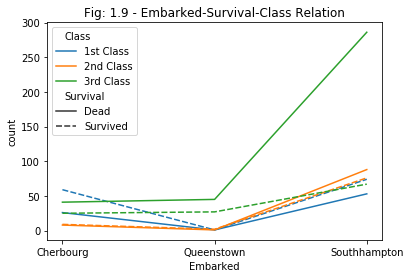

In [44]:
ax = sns.lineplot(x='Embarked', y='count', data = df1, hue = 'Class', style = 'Survival').set_title('Fig: 1.9 - Embarked-Survival-Class Relation')


Text(0.5, 1.0, 'Fig: 2.0 - Embarked-Survival-FareAmount Relation')

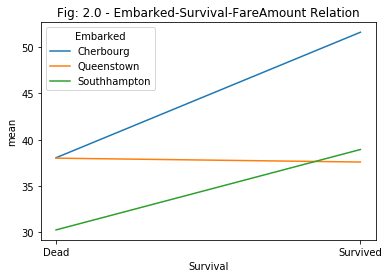

In [45]:
sns.lineplot(x= 'Survival', y ='mean', data = df1, hue = 'Embarked', ci = None).set_title('Fig: 2.0 - Embarked-Survival-FareAmount Relation')

# SOME BASIC CONCLUSIONS :

In [70]:
# Fig : 1.5 --->
    
# Males belonging to the 3rd class has less than 15% prob of survival.
# Males belonging to the 2nd class has approx 16% prob of survival.
# Males belonging to the 1st class has approx 37 % prob of survival.

# So all in all males Passengers had almost 25% probability of survival.

In [71]:
# Females belonging to the 3rd class has approx 50% prob of survival.
# Females belonging to the 2nd class has approx 92% prob of survival.
# Females belonging to the 1st class has approx 96 % prob of survival.

# So all in all female Passengers had almost 80% probability of survival.

In [72]:
# This also lead us to the conclusion that while saving passengers using lifeboat Females were given
# preference over males to access the lifeboat.

In [73]:
# From fig : 1.6 and fig : 2.0  --->

# We conclude that most of the 1st class Passengers were from Cherbourg.
# most of the 2nd and 3rd class Passengers were from Southhampton.

# The mean fare amount from southhampton is also less this means peoples with less fare amount
# were given less preference to use the lifeboat hence mortality number from southhampton is more.

# The mean fare amount from Cherbourg is more than other two ports and more from this we can conclude
# that most of the passengers from Cherbourg were saved.

In [74]:
# So, while saving passengers in this disaster females and higher paying passengers were given more importance
# than males and lower paying passengers.